In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

In [124]:
url = 'db/data.csv'
bcancer = pd.read_csv(url, header=0)
bcancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,...,17.33,184.60,2019.0,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,...,23.41,158.80,1956.0,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,...,25.53,152.50,1709.0,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,...,26.50,98.87,567.7,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,...,16.67,152.20,1575.0,0.14,0.20,0.40,0.16,0.24,0.08,NaN


In [125]:
bcancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [126]:
bcancer.shape

(569, 33)

In [127]:
bcancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.69e+02,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,0.0
mean,3.04e+07,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,NaN
std,1.25e+08,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,NaN
min,8.67e+03,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,NaN
25%,8.69e+05,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,NaN
50%,9.06e+05,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,NaN
75%,8.81e+06,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,NaN
max,9.11e+08,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,NaN


### Cleaning

In [128]:
# Malign = 1
# Benign = 0
bcancer['diagnosis'] = bcancer['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
del bcancer['Unnamed: 32']
del bcancer['id']
bcancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,0.24,...,25.38,17.33,184.60,2019.0,0.16,0.67,0.71,0.27,0.46,0.12
1,1,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,0.18,...,24.99,23.41,158.80,1956.0,0.12,0.19,0.24,0.19,0.28,0.09
2,1,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,0.21,...,23.57,25.53,152.50,1709.0,0.14,0.42,0.45,0.24,0.36,0.09
3,1,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,0.26,...,14.91,26.50,98.87,567.7,0.21,0.87,0.69,0.26,0.66,0.17
4,1,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,0.18,...,22.54,16.67,152.20,1575.0,0.14,0.20,0.40,0.16,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11,0.12,0.24,0.14,0.17,...,25.45,26.40,166.10,2027.0,0.14,0.21,0.41,0.22,0.21,0.07
565,1,20.13,28.25,131.20,1261.0,0.10,0.10,0.14,0.10,0.18,...,23.69,38.25,155.00,1731.0,0.12,0.19,0.32,0.16,0.26,0.07
566,1,16.60,28.08,108.30,858.1,0.08,0.10,0.09,0.05,0.16,...,18.98,34.12,126.70,1124.0,0.11,0.31,0.34,0.14,0.22,0.08
567,1,20.60,29.33,140.10,1265.0,0.12,0.28,0.35,0.15,0.24,...,25.74,39.42,184.60,1821.0,0.17,0.87,0.94,0.27,0.41,0.12


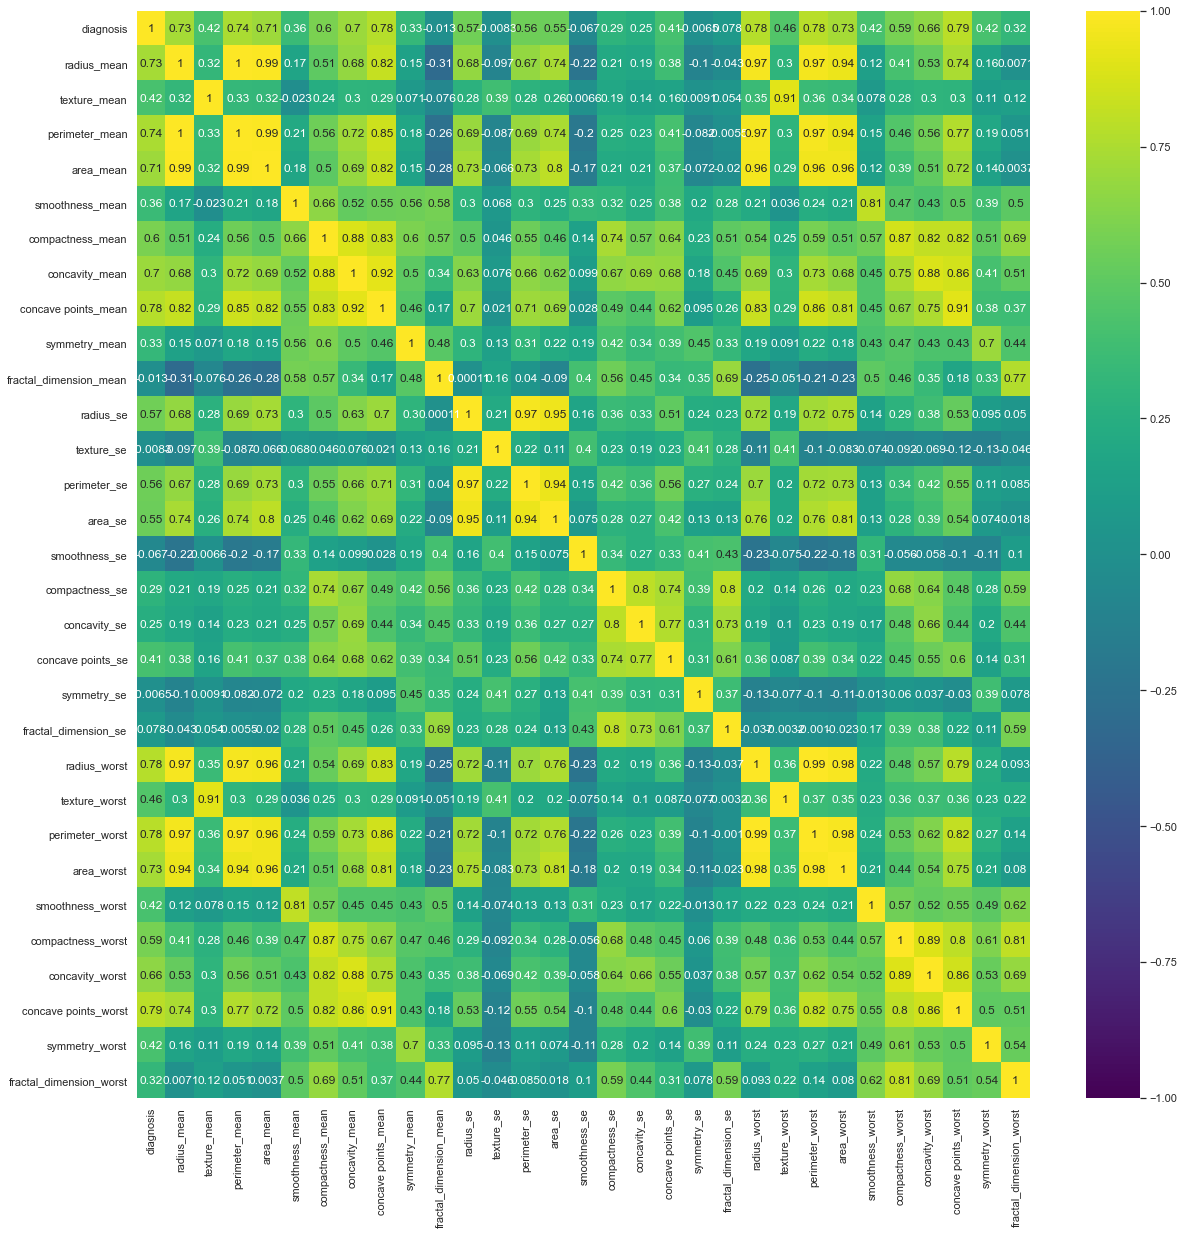

In [129]:
correlation = bcancer.corr(method='pearson')
plt.figure(figsize=(20,20))
ax = sea.heatmap(correlation, annot = True, cmap='viridis', vmin=-1, vmax=1)
plt.show()

In [130]:
cols = list(bcancer.columns)
unused = [col for col in cols if '_worst' not in col and '_se' not in col]
unused

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [131]:
df = bcancer[unused]
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,0.24,0.08
1,1,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,0.18,0.06
2,1,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,0.21,0.06
3,1,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,0.26,0.10
4,1,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,0.18,0.06
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11,0.12,0.24,0.14,0.17,0.06
565,1,20.13,28.25,131.20,1261.0,0.10,0.10,0.14,0.10,0.18,0.06
566,1,16.60,28.08,108.30,858.1,0.08,0.10,0.09,0.05,0.16,0.06
567,1,20.60,29.33,140.10,1265.0,0.12,0.28,0.35,0.15,0.24,0.07


In [132]:
pd.set_option("precision", 2)
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,5.69e+02
mean,0.37,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,6.28e-02
std,0.48,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,7.06e-03
min,0.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,5.00e-02
25%,0.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,5.77e-02
50%,0.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,6.15e-02
75%,1.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,6.61e-02
max,1.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,9.74e-02


In [133]:
correlation = df.corr(method='pearson')
correlation

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,0.33,-0.01
radius_mean,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31
texture_mean,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08
perimeter_mean,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26
area_mean,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28
smoothness_mean,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58
compactness_mean,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57
concavity_mean,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34
concave points_mean,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17
symmetry_mean,0.33,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48


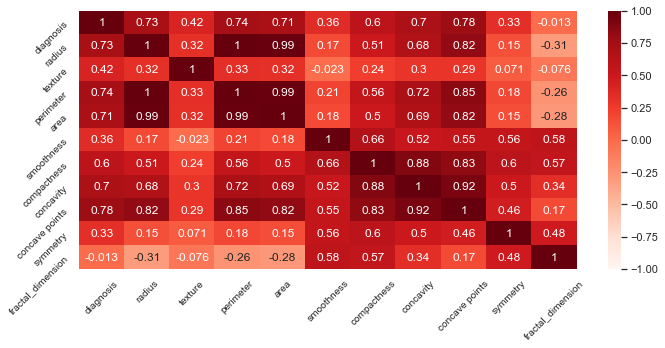

In [134]:
plt.figure(figsize=(10,5))
ax = sea.heatmap(correlation, annot = True, cmap='Reds', vmin=-1, vmax=1)
ax.set_yticklabels([(lambda x: x.get_text().replace('_mean', ''))(x) for x in list(ax.get_yticklabels())], rotation = 45, fontsize = 10)
ax.set_xticklabels([(lambda x: x.get_text().replace('_mean', ''))(x) for x in list(ax.get_xticklabels())], rotation = 45, fontsize = 10)
plt.tight_layout()
plt.savefig("corr-original.png", dpi=500)
plt.show()

In [135]:
del df['radius_mean']
df

,diagnosis,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,0.24,0.08
1,1,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,0.18,0.06
2,1,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,0.21,0.06
3,1,20.38,77.58,386.1,0.14,0.28,0.24,0.11,0.26,0.10
4,1,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,0.18,0.06
...,...,...,...,...,...,...,...,...,...,...
564,1,22.39,142.00,1479.0,0.11,0.12,0.24,0.14,0.17,0.06
565,1,28.25,131.20,1261.0,0.10,0.10,0.14,0.10,0.18,0.06
566,1,28.08,108.30,858.1,0.08,0.10,0.09,0.05,0.16,0.06
567,1,29.33,140.10,1265.0,0.12,0.28,0.35,0.15,0.24,0.07


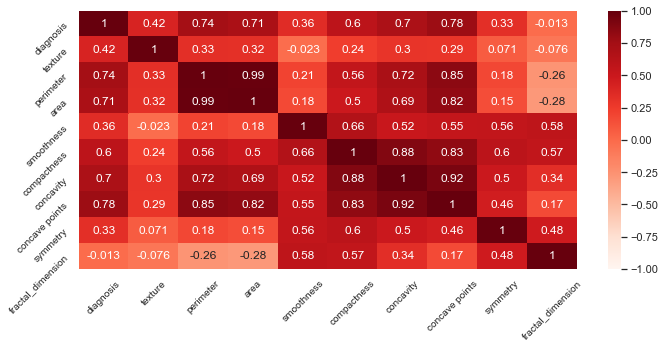

In [136]:
correlation = df.corr(method='pearson')
plt.figure(figsize=(10,5))
ax = sea.heatmap(correlation, annot = True, cmap='Reds', vmin=-1, vmax=1)
ax.set_yticklabels([(lambda x: x.get_text().replace('_mean', ''))(x) for x in list(ax.get_yticklabels())], rotation = 45, fontsize = 10)
ax.set_xticklabels([(lambda x: x.get_text().replace('_mean', ''))(x) for x in list(ax.get_xticklabels())], rotation = 45, fontsize = 10)
plt.tight_layout()
plt.savefig("correlation.png", dpi=500)
plt.show()

In [137]:
df.groupby('diagnosis').size()

diagnosis
0    357
1    212
dtype: int64

In [138]:
print(df.head())

   diagnosis  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          1         10.38          122.80     1001.0             0.12   
1          1         17.77          132.90     1326.0             0.08   
2          1         21.25          130.00     1203.0             0.11   
3          1         20.38           77.58      386.1             0.14   
4          1         14.34          135.10     1297.0             0.10   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0              0.28            0.30                 0.15           0.24   
1              0.08            0.09                 0.07           0.18   
2              0.16            0.20                 0.13           0.21   
3              0.28            0.24                 0.11           0.26   
4              0.13            0.20                 0.10           0.18   

   fractal_dimension_mean  
0                    0.08  
1                    0.06  
2                   

In [139]:
benign = df.groupby('diagnosis').size()[0]
malign = df.groupby('diagnosis').size()[1]
total = malign + benign
print(total)
benign_p = benign / (total) * 100
malign_p = malign / (total) * 100
print(f"benign: {benign_p:.2f}%")
print(f"malign: {malign_p:.2f}%")

569
benign: 62.74%
malign: 37.26%


In [140]:
headers = list(df.columns)
headers = headers[1:len(headers)]
heads = [(lambda x: x.replace('_mean', ''))(x) for x in headers]
heads

['texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'concavity',
 'concave points',
 'symmetry',
 'fractal_dimension']

In [141]:
df_x = pd.DataFrame(df.values[:,1:], columns=heads)
df_x

,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,0.24,0.08
1,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,0.18,0.06
2,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,0.21,0.06
3,20.38,77.58,386.1,0.14,0.28,0.24,0.11,0.26,0.10
4,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,0.18,0.06
...,...,...,...,...,...,...,...,...,...
564,22.39,142.00,1479.0,0.11,0.12,0.24,0.14,0.17,0.06
565,28.25,131.20,1261.0,0.10,0.10,0.14,0.10,0.18,0.06
566,28.08,108.30,858.1,0.08,0.10,0.09,0.05,0.16,0.06
567,29.33,140.10,1265.0,0.12,0.28,0.35,0.15,0.24,0.07


C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

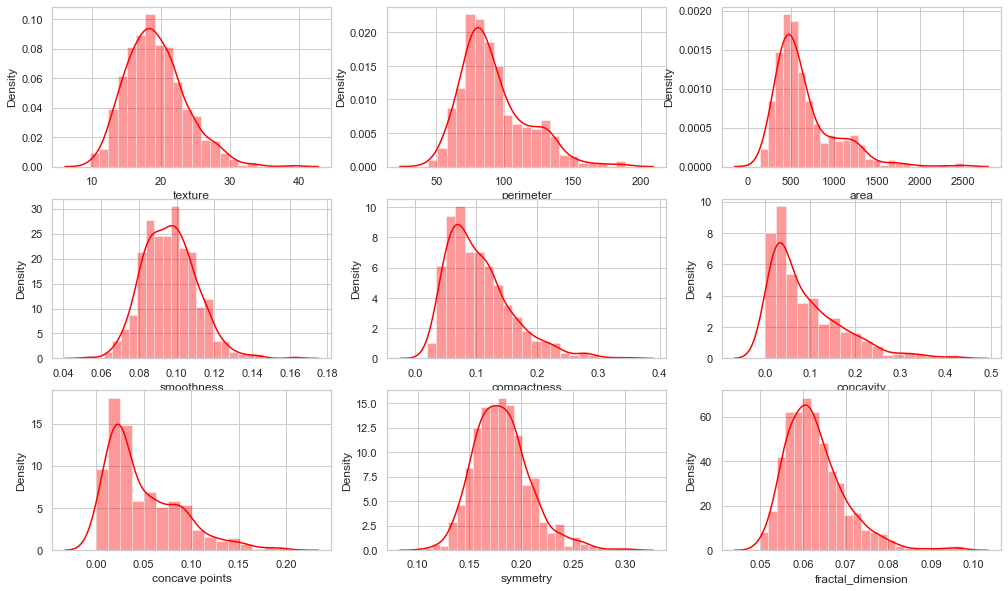

In [146]:
sea.set(style=None)
f, axes = plt.subplots(3,3, figsize=(17,10))
for i in range(3):
    for j in range(3):
        sea.distplot(df_x[heads[(i)*3 + j]], ax=axes[i,j], fit_kws={"color":"red"}, color=(1,0,0))

C:\Users\mariana\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


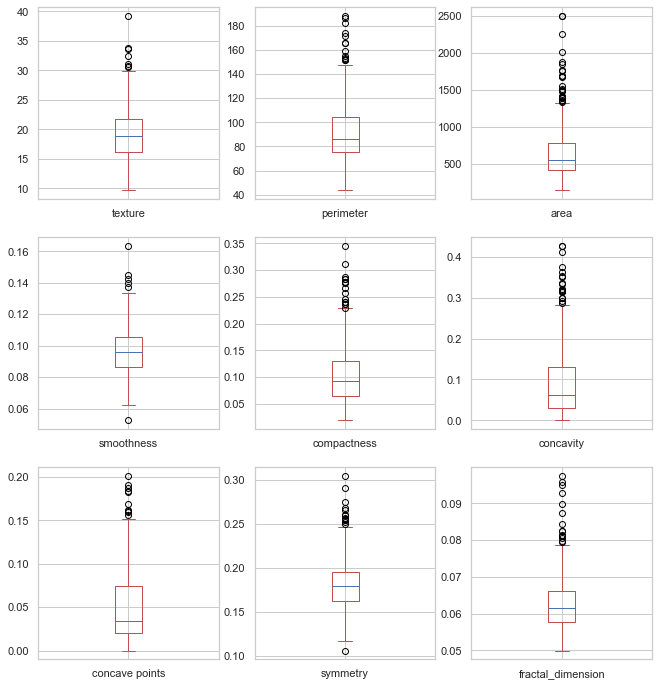

In [147]:
sea.set(style=None)
fig1 = plt.figure(figsize=(11,12))
ax = fig1.gca()

df_x.plot(ax=ax, kind='box', subplots=True, layout=(3,3), color=dict(boxes='r', whiskers='r', medians='b', caps='r'))
plt.xticks(rotation=0)
plt.show()

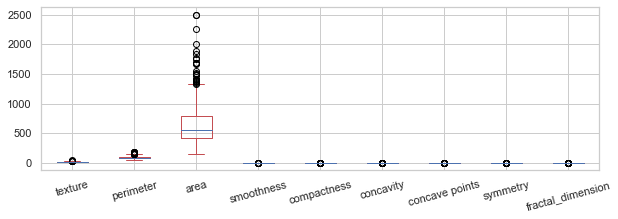

In [148]:
fig1 = plt.figure(figsize=(10,3))
ax = fig1.gca()

df_x.plot(ax=ax, kind='box', subplots=False, color=dict(boxes='r', whiskers='r', medians='b', caps='r'))
plt.xticks(rotation=15)
plt.show()

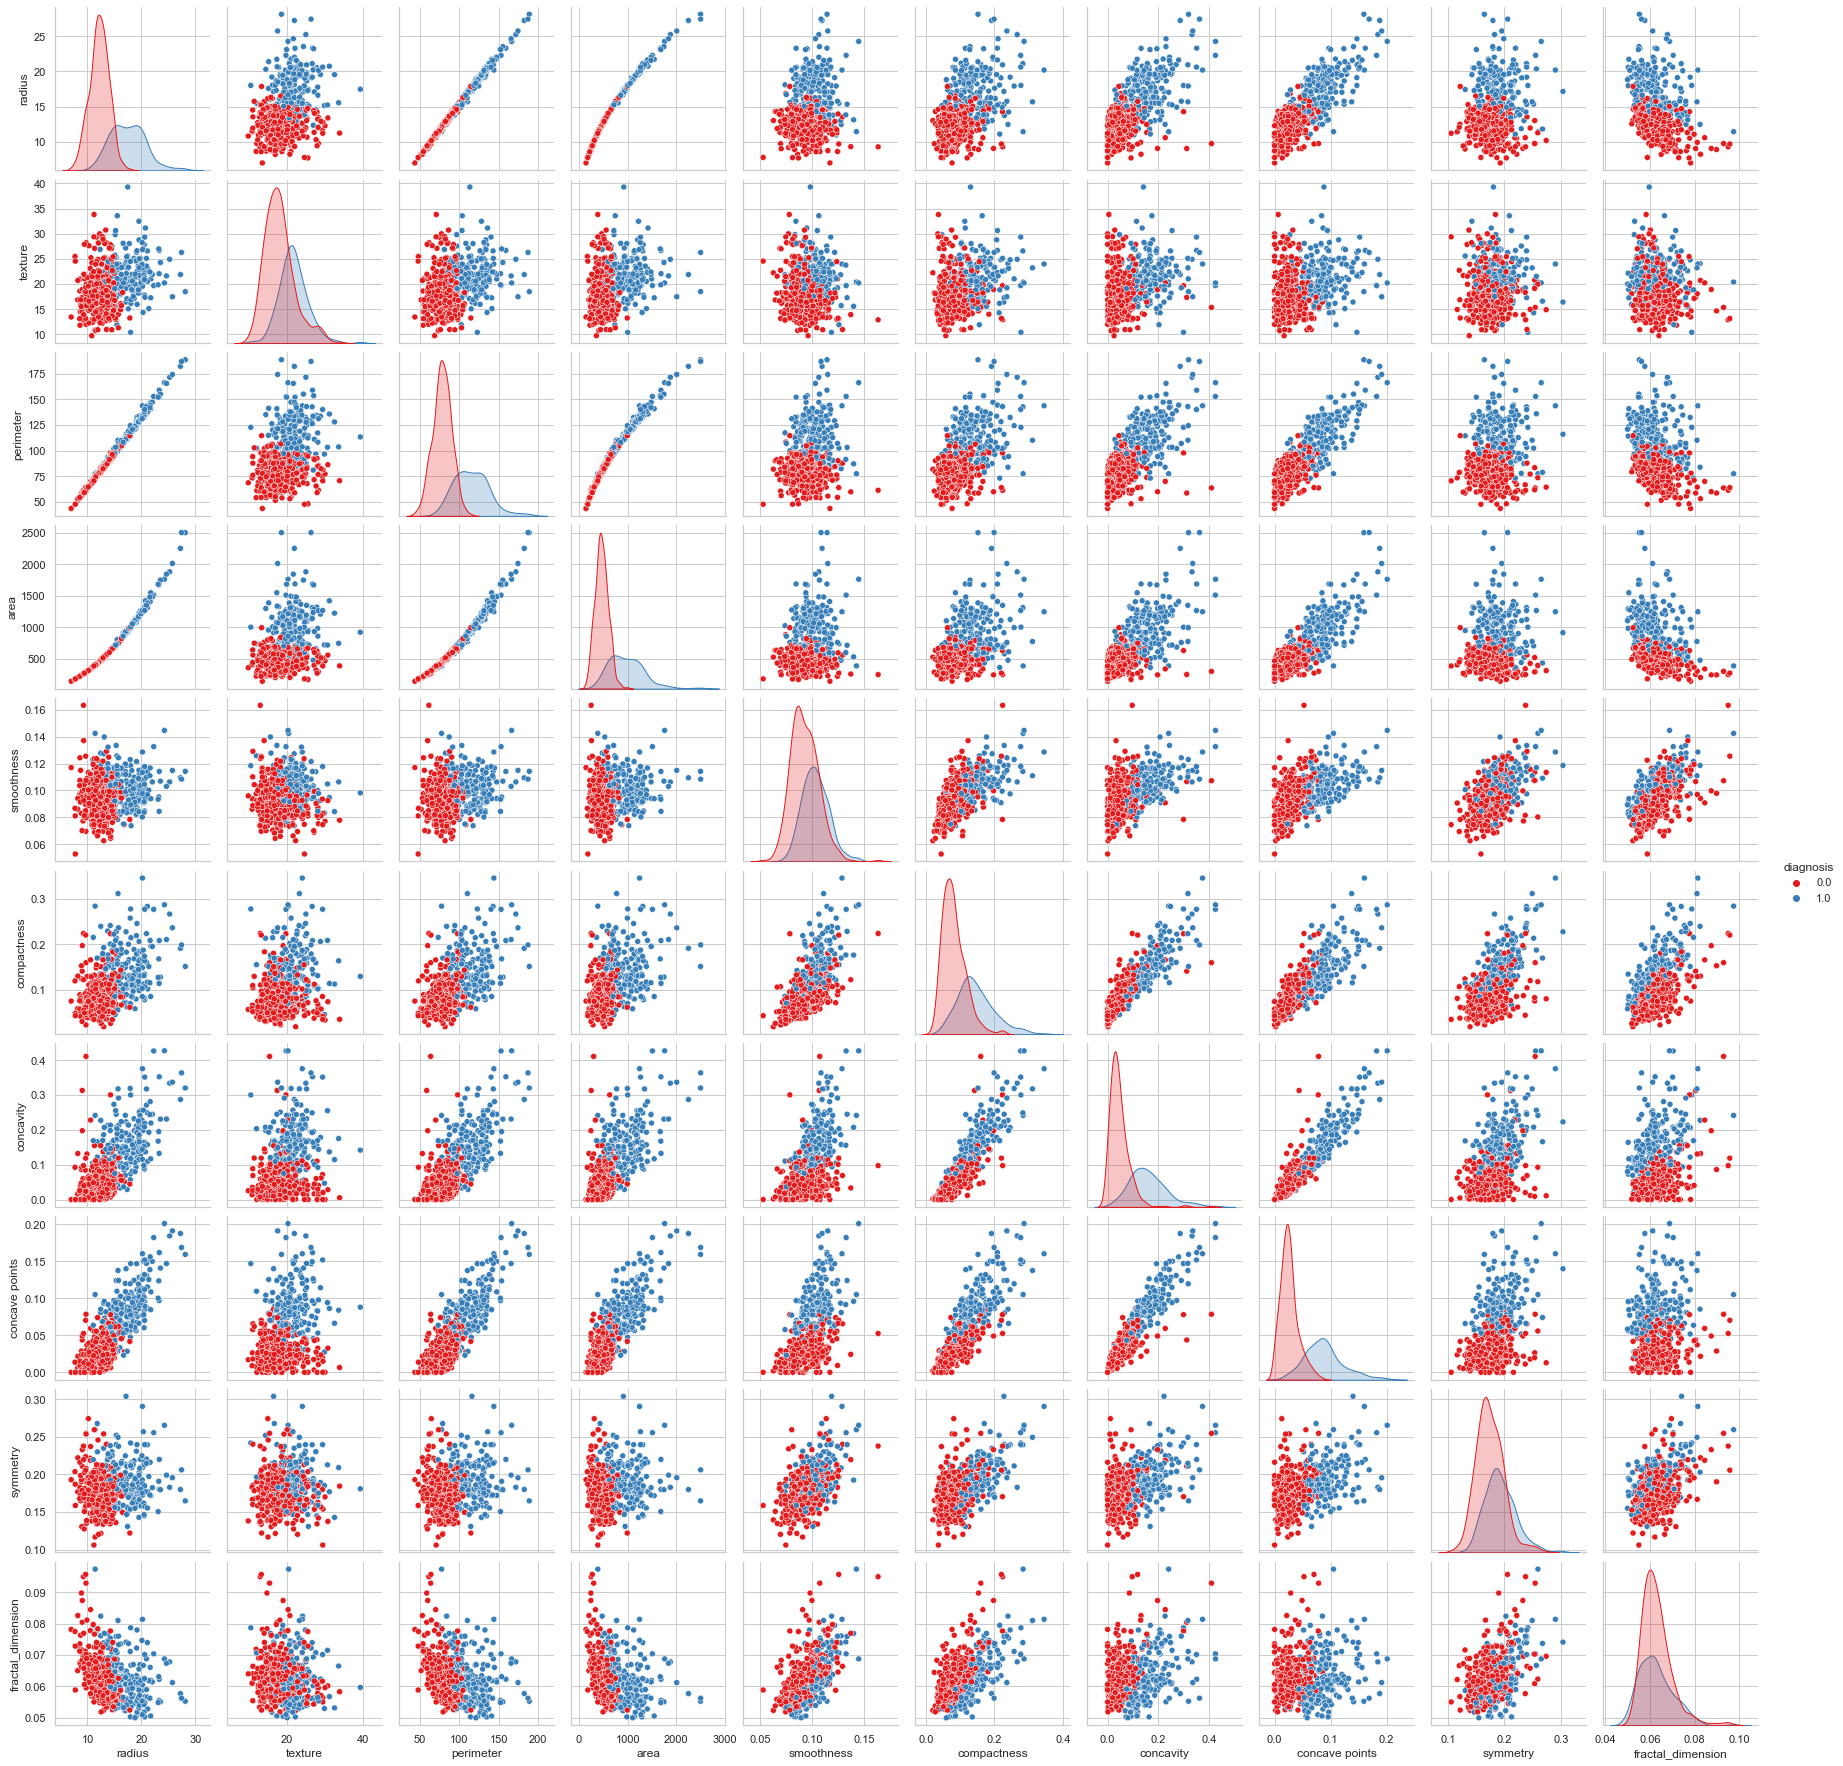

In [99]:
sea.set(style="whitegrid", palette="Set1")
pp = pd.DataFrame(df.values, columns=['diagnosis', 'radius']+heads)
sea.pairplot(pp, hue='diagnosis')

## 1. Cross Validation

### Simple Cross Validation

In [149]:
slots_cv_ac = []
slots_cv_std = []
array = df.values
print(len(array[0,:]))
x = array[:,1:len(array[0,:])]
y = array[:,0]
print(x)
print(y)

10
[[1.038e+01 1.228e+02 1.001e+03 ... 1.471e-01 2.419e-01 7.871e-02]
 [1.777e+01 1.329e+02 1.326e+03 ... 7.017e-02 1.812e-01 5.667e-02]
 [2.125e+01 1.300e+02 1.203e+03 ... 1.279e-01 2.069e-01 5.999e-02]
 ...
 [2.808e+01 1.083e+02 8.581e+02 ... 5.302e-02 1.590e-01 5.648e-02]
 [2.933e+01 1.401e+02 1.265e+03 ... 1.520e-01 2.397e-01 7.016e-02]
 [2.454e+01 4.792e+01 1.810e+02 ... 0.000e+00 1.587e-01 5.884e-02]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 1

In [150]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 

num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True) 
model = LogisticRegression(solver='lbfgs', max_iter=3500)
# apply everything
results = cross_val_score(model, x, y, cv=kfold)
acc = results.mean() * 100 # percentage of accuracy
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
slots_cv_ac.append(acc)
slots_cv_std.append(stdev)

accuracy: 90.69% std: 4.36%


### Standard Transform & Cross Validation

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)

num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True) 
model = LogisticRegression(solver='lbfgs', max_iter=100)
# apply everything
results = cross_val_score(model, rescaledX, y, cv=kfold)
acc = results.mean() * 100 # percentage of accuracy
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
slots_cv_ac.append(acc)
slots_cv_std.append(stdev)

accuracy: 94.21% std: 3.04%


### Standard Transform, Power Transformer & Cross Validation

In [152]:
headers = list(df.columns)
headers = headers[1:len(headers)]
heads = [(lambda x: x.replace('_mean', ''))(x) for x in headers]

df_std = pd.DataFrame(rescaledX, columns = heads)
df_std

,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,-2.07,1.27,0.98,1.57,3.28,2.65,2.53,2.22e+00,2.26
1,-0.35,1.69,1.91,-0.83,-0.49,-0.02,0.55,1.39e-03,-0.87
2,0.46,1.57,1.56,0.94,1.05,1.36,2.04,9.40e-01,-0.40
3,0.25,-0.59,-0.76,3.28,3.40,1.92,1.45,2.87e+00,4.91
4,-1.15,1.78,1.83,0.28,0.54,1.37,1.43,-9.56e-03,-0.56
...,...,...,...,...,...,...,...,...,...
564,0.72,2.06,2.34,1.04,0.22,1.95,2.32,-3.13e-01,-0.93
565,2.09,1.62,1.72,0.10,-0.02,0.69,1.26,-2.18e-01,-1.06
566,2.05,0.67,0.58,-0.84,-0.04,0.05,0.11,-8.09e-01,-0.90
567,2.34,1.98,1.74,1.53,3.27,3.30,2.66,2.14e+00,1.04


In [153]:
from sklearn.preprocessing import PowerTransformer

skewed = ['perimeter', 'area', 'compactness', 'concavity', 'concave points', 'fractal_dimension']
features = df_std[skewed]
#features = df_std.copy()
pt = PowerTransformer(method='yeo-johnson', standardize=False)
skl_yeo = pt.fit(features)
print(pt.lambdas_)
skl_yeo = pt.transform(features)
df_yeo = pd.DataFrame(data=skl_yeo, columns=skewed)
#df_yeo = pd.DataFrame(data=skl_yeo, columns=heads)
df_yeo

[ 0.38167627  0.00462353  0.27974738 -0.00606364  0.11014255  0.38765247]


,perimeter,area,compactness,concavity,concave points,fractal_dimension
0,0.96,0.69,1.80,1.29,1.35,1.50
1,1.20,1.07,-0.57,-0.02,0.45,-1.08
2,1.13,0.94,0.80,0.86,1.18,-0.44
3,-0.69,-1.06,1.84,1.07,0.94,2.56
4,1.25,1.04,0.46,0.86,0.93,-0.65
...,...,...,...,...,...,...
564,1.40,1.21,0.20,1.08,1.28,-1.17
565,1.16,1.00,-0.02,0.53,0.85,-1.37
566,0.57,0.46,-0.04,0.05,0.10,-1.12
567,1.36,1.01,1.79,1.45,1.39,0.82


In [154]:
df_std_yeo = df_std.copy()
cols = skewed
#cols = heads
for col in cols:
    df_std_yeo[col] = df_yeo[col]
df_std_yeo

,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,-2.07,0.96,0.69,1.57,1.80,1.29,1.35,2.22e+00,1.50
1,-0.35,1.20,1.07,-0.83,-0.57,-0.02,0.45,1.39e-03,-1.08
2,0.46,1.13,0.94,0.94,0.80,0.86,1.18,9.40e-01,-0.44
3,0.25,-0.69,-1.06,3.28,1.84,1.07,0.94,2.87e+00,2.56
4,-1.15,1.25,1.04,0.28,0.46,0.86,0.93,-9.56e-03,-0.65
...,...,...,...,...,...,...,...,...,...
564,0.72,1.40,1.21,1.04,0.20,1.08,1.28,-3.13e-01,-1.17
565,2.09,1.16,1.00,0.10,-0.02,0.53,0.85,-2.18e-01,-1.37
566,2.05,0.57,0.46,-0.84,-0.04,0.05,0.10,-8.09e-01,-1.12
567,2.34,1.36,1.01,1.53,1.79,1.45,1.39,2.14e+00,0.82


In [155]:
array = df_std_yeo.values
transformedX = array[:,1:len(array[0,:])]

num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True) 
model = LogisticRegression(solver='lbfgs', max_iter=100)
# apply everything
results = cross_val_score(model, transformedX, y, cv=kfold)
acc = results.mean() * 100 # percentage of accuracy
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
# 92.26% with all cols pt # 91.56% with yeo std=True
slots_cv_ac.append(acc)
slots_cv_std.append(stdev)
display(slots_cv_ac, slots_cv_std)

accuracy: 91.57% std: 3.30%


[90.69235588972431, 94.21052631578947, 91.56954887218043]

[4.363315354093243, 3.043745889982012, 3.301310901350622]

## 2. Division by Percentage
### Division by Percentage

In [165]:
from sklearn.model_selection import train_test_split # division by percentage
from sklearn.linear_model import LogisticRegression

slots_dp_ac = []

test_size = 0.33
seed = 1
# returns you the subsets for training and testing for each x and y
# division by percentage is faster, but less accurate
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = seed)
model = LogisticRegression(solver='lbfgs', max_iter=3500)
model.fit(x_train, y_train)
results = model.score(x_test, y_test)
acc = results * 100
print(f"accuracy: {acc:.2f}%") # percentage of accuracy
slots_dp_ac.append(acc)

accuracy: 87.77%


### Standard Transform & Division by Percentage

In [166]:
test_size = 0.33
seed = 1

x_train, x_test, y_train, y_test = train_test_split(rescaledX, y, test_size = test_size, random_state = seed)
model = LogisticRegression(solver='lbfgs', max_iter=100)
model.fit(x_train, y_train)
results = model.score(x_test, y_test)
acc = results * 100
print(f"accuracy: {acc:.2f}%") # percentage of accuracy
slots_dp_ac.append(acc)

accuracy: 93.09%


### Standard Transform, Power Transformer & Cross Validation

In [167]:
array = df_std_yeo.values
transformedX = array[:,1:len(array[0,:])]

x_train, x_test, y_train, y_test = train_test_split(transformedX, y, test_size = test_size, random_state = seed)
model = LogisticRegression(solver='lbfgs', max_iter=100)
model.fit(x_train, y_train)
results = model.score(x_test, y_test)
acc = results * 100
print(f"accuracy: {acc:.2f}%") # percentage of accuracy
slots_dp_ac.append(acc)
display(slots_dp_ac)

accuracy: 91.49%


[87.7659574468085, 93.08510638297872, 91.48936170212765]

## 3. Cross Validation with Repetition
### Cross Validation with Repetition

In [168]:
from sklearn.model_selection import RepeatedKFold # Cross Validation with Repetition
from sklearn.model_selection import cross_val_score # validation method
from sklearn.linear_model import LogisticRegression # math model for classification

slots_cvr_ac = []
slots_cvr_std = []

num_folds = 10
num_repeated = 5
repeatedkfold = RepeatedKFold(n_splits=num_folds, n_repeats=num_repeated)
model = LogisticRegression(solver='lbfgs', max_iter=3500)
results = cross_val_score(model, x, y, cv=repeatedkfold)
acc = results.mean() * 100 # percentage of accuracy
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
# like 6 seconds
slots_cvr_ac.append(acc)
slots_cvr_std.append(stdev)

accuracy: 90.58% std: 3.14%


### Standard Transform & Cross Validation with Repetition

In [169]:
num_folds = 10
num_repeated = 5
repeatedkfold = RepeatedKFold(n_splits=num_folds, n_repeats=num_repeated)
model = LogisticRegression(solver='lbfgs', max_iter=100)
results = cross_val_score(model, rescaledX, y, cv=repeatedkfold)
acc = results.mean() * 100 # percentage of accuracy
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
slots_cvr_ac.append(acc)
slots_cvr_std.append(stdev)

accuracy: 93.78% std: 2.47%


### Standard Transform, Power Transformer & Cross Validation with Repetition

In [170]:
array = df_std_yeo.values
transformedX = array[:,1:len(array[0,:])]

num_folds = 10
num_repeated = 5
repeatedkfold = RepeatedKFold(n_splits=num_folds, n_repeats=num_repeated)
model = LogisticRegression(solver='lbfgs', max_iter=100)
results = cross_val_score(model, transformedX, y, cv=repeatedkfold)
acc = results.mean() * 100 # percentage of accuracy
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
slots_cvr_ac.append(acc)
slots_cvr_std.append(stdev)
display(slots_cvr_ac, slots_cvr_std)

accuracy: 91.70% std: 3.77%


[90.58082706766918, 93.77694235588972, 91.70426065162906]

[3.137900724253459, 2.4675881494245413, 3.768582141264312]

## 4. Leave One Out Cross Validation
### Leave One Out Cross Validation

In [171]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score # validation method
from sklearn.linear_model import LogisticRegression # math model for classification

slots_loocv_ac = []
slots_loocv_std = []

loocv = LeaveOneOut()
model = LogisticRegression(solver='lbfgs', max_iter=3500)
results = cross_val_score(model, x, y, cv=loocv)
acc = results.mean() * 100
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
slots_loocv_ac.append(acc)
slots_loocv_std.append(stdev)
# like 12 seconds

accuracy: 90.69% std: 29.06%


### Standard Transform & Leave One Out Cross Validation

In [172]:
loocv = LeaveOneOut()
model = LogisticRegression(solver='lbfgs', max_iter=100)
results = cross_val_score(model, rescaledX, y, cv=loocv)
acc = results.mean() * 100
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
# like 2 seconds
slots_loocv_ac.append(acc)
slots_loocv_std.append(stdev)

accuracy: 94.20% std: 23.37%


### Standard Transform, Power Transformer & Leave One Out Cross Validation

In [173]:
array = df_std_yeo.values
transformedX = array[:,1:len(array[0,:])]

loocv = LeaveOneOut()
model = LogisticRegression(solver='lbfgs', max_iter=100)
results = cross_val_score(model, transformedX, y, cv=loocv)
acc = results.mean() * 100
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%") # like 2 seconds
slots_loocv_ac.append(acc)
slots_loocv_std.append(stdev)
display(slots_loocv_ac, slots_loocv_std)

accuracy: 91.74% std: 27.53%


[90.68541300527241, 94.20035149384886, 91.73989455184535]

[29.063674382128816, 23.37368023697195, 27.527825973019223]

## 5. Division by Percentage with Repetition (random 33% subsets)
### Division by Percentage with Repetition

In [174]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score # validation method
from sklearn.linear_model import LogisticRegression # math model for classification

slots_dpr_ac = []
slots_dpr_std = []

test_size = 0.33
n_splits = 10
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size)
kfold = ShuffleSplit(n_splits=n_splits, test_size = test_size)
model = LogisticRegression(solver='lbfgs', max_iter=3500)
results = cross_val_score(model, x, y, cv=kfold)
acc = results.mean() * 100
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
slots_dpr_ac.append(acc)
slots_dpr_std.append(stdev)

accuracy: 89.95% std: 1.08%


### Standard Transform & Division by Percentage with Repetition

In [175]:
test_size = 0.33
n_splits = 10
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size)
kfold = ShuffleSplit(n_splits=n_splits, test_size = test_size)
model = LogisticRegression(solver='lbfgs', max_iter=100)
results = cross_val_score(model, rescaledX, y, cv=kfold)
acc = results.mean() * 100
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
slots_dpr_ac.append(acc)
slots_dpr_std.append(stdev)

accuracy: 93.62% std: 0.98%


### Standard Transform, Power Transformer & Division by Percentage with Repetition

In [176]:
test_size = 0.33
n_splits = 10
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size)
kfold = ShuffleSplit(n_splits=n_splits, test_size = test_size)
model = LogisticRegression(solver='lbfgs', max_iter=100)
results = cross_val_score(model, transformedX, y, cv=kfold)
acc = results.mean() * 100
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
slots_dpr_ac.append(acc)
slots_dpr_std.append(stdev)
display(slots_dpr_ac, slots_dpr_std)

accuracy: 91.38% std: 1.73%


[89.9468085106383, 93.61702127659575, 91.38297872340425]

[1.0757312987317387, 0.9808026018396705, 1.728518809497015]

## Common Plots for all Techniques

C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

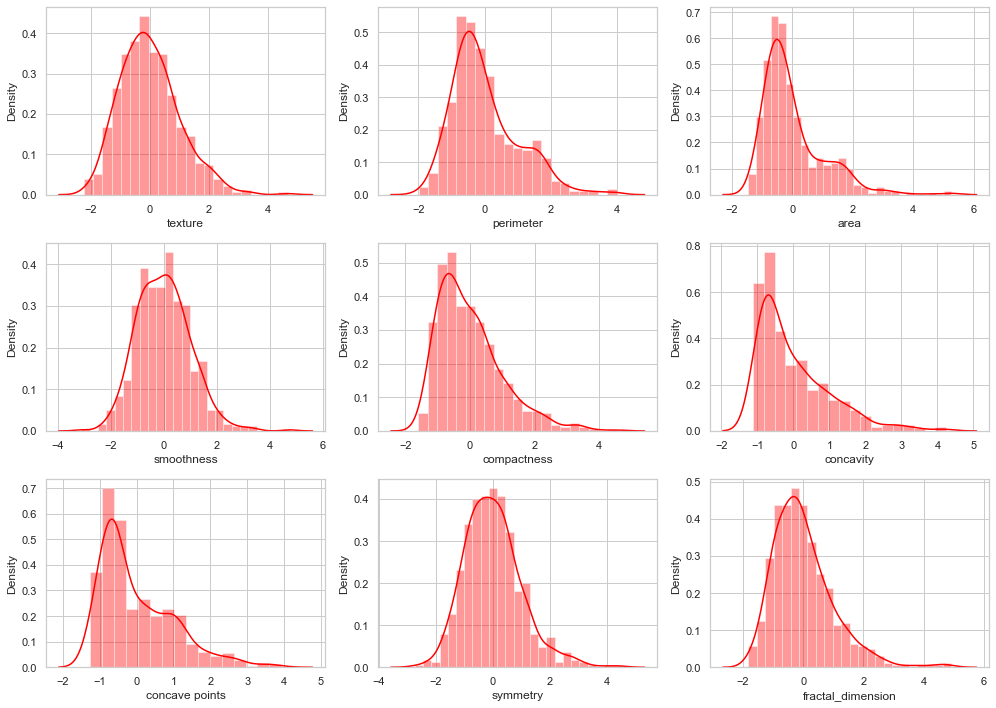

In [158]:
# SAME: RESCALED X DENSITY PLOT
sea.set(style=None)
f, axes = plt.subplots(3,3, figsize=(14,10))
for i in range(3):
    for j in range(3):
        sea.distplot(df_std[heads[(i)*3 + j]], ax=axes[i,j], fit_kws={"color":"red"}, color=(1,0,0))
plt.tight_layout()
plt.savefig("out-images/rescaledX.png", dpi=500)

C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

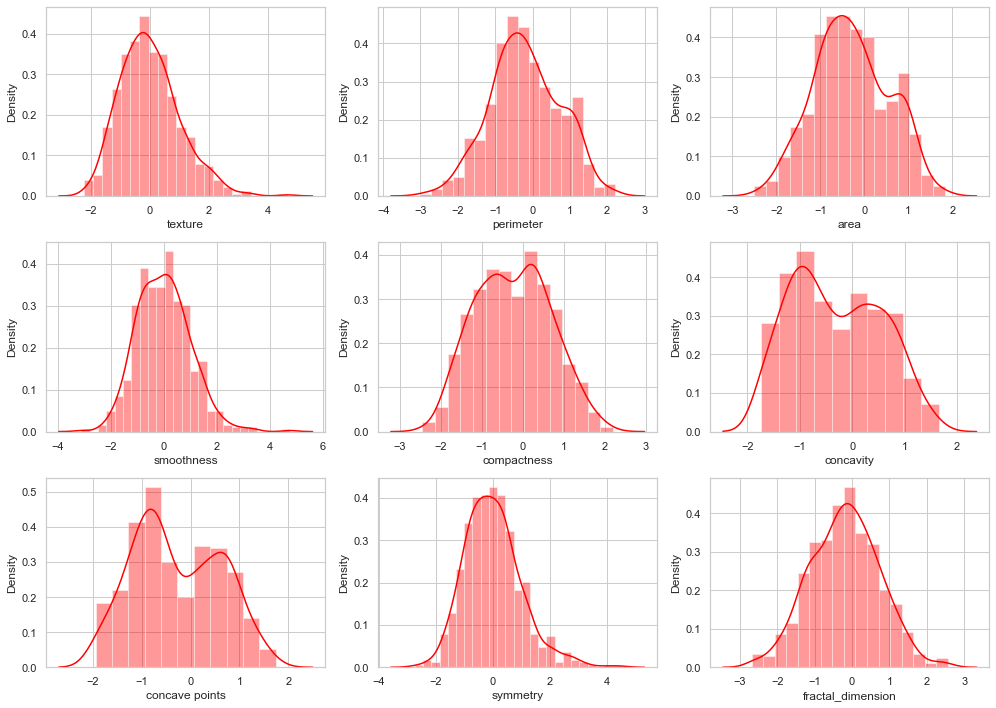

In [161]:
# SAME: TRANSFORMED X DENSITY PLOT
sea.set(style=None)
f, axes = plt.subplots(3,3, figsize=(14,10))
for i in range(3):
    for j in range(3):
        sea.distplot(df_std_yeo[heads[(i)*3 + j]], ax=axes[i,j], fit_kws={"color":"red"}, color=(1,0,0))
plt.tight_layout()
plt.savefig("out-images/transformedX.png", dpi=500)

9


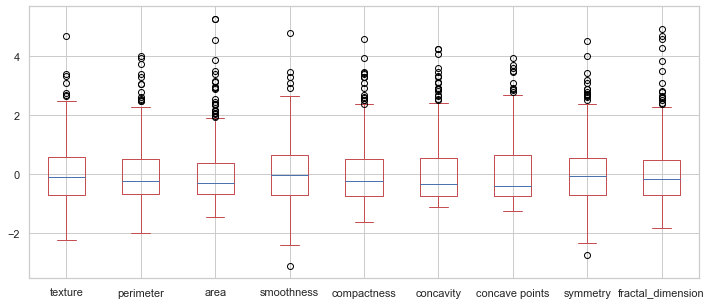

In [162]:
# SAME: RESCALED X BOX PLOT
fig1 = plt.figure(figsize=(12,5))
ax = fig1.gca()
# for logistic regression only transform using normalization

print(len(rescaledX[0,:]))
heads = [(lambda x: x.replace('_mean', ''))(x) for x in headers]
pd.DataFrame(rescaledX, columns=heads).plot(ax=ax, kind='box', subplots=False, color=dict(boxes='r', whiskers='r', medians='b', caps='r'))
plt.grid(True)
plt.xticks(rotation=0)
plt.savefig("out-images/box-std.png", dpi=500)
plt.show()

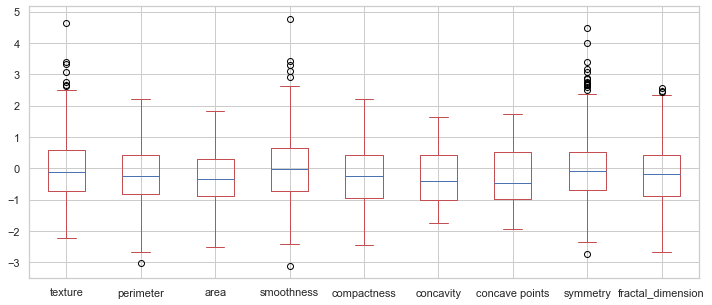

In [163]:
# SAME: TRANSFORMED X BOX PLOT
fig1 = plt.figure(figsize=(12,5))
ax = fig1.gca()
# for logistic regression only transform using normalization

df_std_yeo.plot(ax=ax, kind='box', subplots=False, color=dict(boxes='r', whiskers='r', medians='b', caps='r'))
plt.grid(True)
plt.xticks(rotation=0)
plt.savefig("out-images/box-std-yeo.png", dpi=500)
plt.show()

In [39]:
# bar plot accuracy for all tehcniques
slots = [0, 0, 0]
techniques = 5
totalac = []
totalstd = []
for i in range(techniques):
    totalac.append(slots)
    totalstd.append(slots)
display(totalac)
display(totalstd)
totalac[0] = slots_cv_ac
totalac[1] = slots_cvr_ac
totalac[2] = slots_dp_ac
totalac[3] = slots_dpr_ac
totalac[4] = slots_loocv_ac
display(totalac)

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]

[[90.67355889724308, 93.48997493734336, 91.73872180451129],
 [90.68671679197995, 93.74185463659147, 91.74498746867168],
 [87.7659574468085, 93.08510638297872, 91.48936170212765],
 [90.63829787234042, 94.04255319148935, 91.59574468085106],
 [90.68541300527241, 94.20035149384886, 91.73989455184535]]

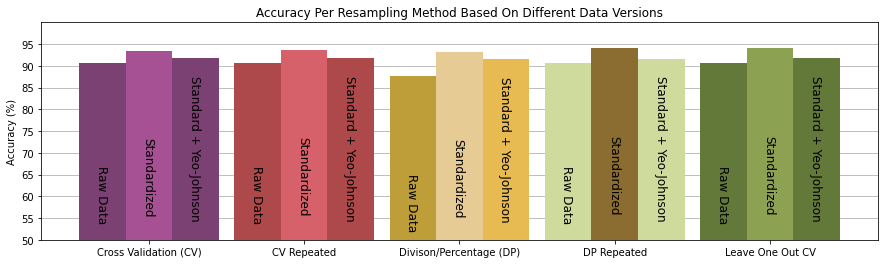

In [40]:
from matplotlib import cm
cmap1 = cm.get_cmap("tab20b")
top = 100
bottom = 50
deciles = int((top - bottom) / 10)

width = 0.3
xs = list(np.arange(0, len(totalac)))
offset = [-1, 0, 1]
colors = []
for i in range(len(totalac)):
    colors.append([cmap1(c - ((i+1)*0.15)) for c in np.array(totalac[i]) / max(totalac[i])])
labels = ['Raw Data', 'Standardized', 'Standard + Yeo-Johnson']
fig2 = plt.figure(figsize=(15, 4))
ax2 = fig2.add_subplot(1,1,1)

for t in range(len(totalac)):
    for d in range(len(totalac[t])):
        ax2.bar(np.array(xs[t]) + (width)*(offset[d]), totalac[t][d], width=width, color=colors[t][d], zorder=3)
        ax2.annotate(labels[d], (np.array(xs[t]) + (width)*(offset[d]) - (width/6.0), 
                                 totalac[t][d] - totalac[t][d] * 0.4), fontsize=12, rotation=-90)
ax2.set_xticks(xs)
ax2.set_xticklabels(['Cross Validation (CV)', 'CV Repeated', 'Divison/Percentage (DP)', 'DP Repeated', 'Leave One Out CV'])
ax2.grid(zorder=0, axis='y')
plt.ylim((bottom, top))
plt.yticks([i * deciles + bottom for i in range(deciles*2)])
ax2.set_title("Accuracy Per Resampling Method Based On Different Data Versions")
plt.ylabel("Accuracy (%)")
plt.show()
fig2.tight_layout()
fig2.savefig('acc-plot2.png', dpi=500)

     perimeter  area  compactness  concavity  concave points  \
0         1.27  0.98         3.28       2.65            2.53   
1         1.69  1.91        -0.49      -0.02            0.55   
2         1.57  1.56         1.05       1.36            2.04   
3        -0.59 -0.76         3.40       1.92            1.45   
4         1.78  1.83         0.54       1.37            1.43   
..         ...   ...          ...        ...             ...   
564       2.06  2.34         0.22       1.95            2.32   
565       1.62  1.72        -0.02       0.69            1.26   
566       0.67  0.58        -0.04       0.05            0.11   
567       1.98  1.74         3.27       3.30            2.66   
568      -1.81 -1.35        -1.15      -1.11           -1.26   

     fractal_dimension  
0                 2.26  
1                -0.87  
2                -0.40  
3                 4.91  
4                -0.56  
..                 ...  
564              -0.93  
565              -1.06  
566   

C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

accuracy: 90.96%
accuracy: 90.43%
accuracy: 90.43%
accuracy: 90.43%


C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

accuracy: 90.43%
accuracy: 90.96%
accuracy: 91.49%
accuracy: 91.49%


C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

accuracy: 92.02%


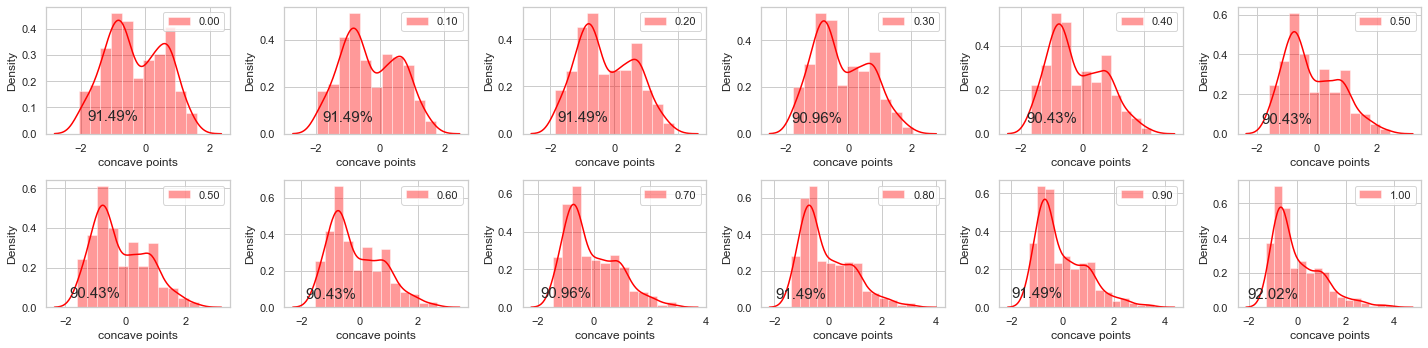

In [177]:
column = 'concave points'
skewed = ['perimeter', 'area', 'compactness', 'concavity', 'concave points', 'fractal_dimension']
features = df_std[skewed]
print(features)

pt = PowerTransformer(method='yeo-johnson', standardize=False)

# fit the data to the power transform
skl_yeo = pt.fit(features)
print(pt.lambdas_)

fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

frames = 5
rows = 2
inc = 1.0 / (frames*2.0)

for i in range(rows):
    for j in range(frames+1):
        col_l = (inc * (i*(frames) + j))
        pt.lambdas_ = np.array([col_l]*6)
        skl_yeo = pt.transform(features)
        df_features = pd.DataFrame(data=skl_yeo, columns=skewed)

        array = df_features.values
        transformedX = array

        x_train, x_test, y_train, y_test = train_test_split(transformedX, y, test_size = test_size, random_state = seed)
        model = LogisticRegression(solver='lbfgs', max_iter=100)
        model.fit(x_train, y_train)
        results = model.score(x_test, y_test)
        acc = results * 100
        print(f"accuracy: {acc:.2f}%") # percentage of accuracy

        ax = fig.add_subplot(rows,frames+1, ((i*(frames+1) + j + 1)))
        dplot = sea.distplot(df_features[column],  ax=ax, label="{:.2f}".format(col_l), fit_kws={"color":"red"}, color=(1,0,0))
        dplot.annotate(f"{acc:.2f}%", xy = (-1, 0.05), horizontalalignment='center', fontsize=15)
        plt.legend()

fig.tight_layout()
plt.savefig('lambdas.png', dpi=500)
plt.show()

## Cohen Kappa Score

In [44]:
from sklearn.metrics import cohen_kappa_score
test_size = 0.33 # 33% de 768 is 254, the sum of all in matrix var
seed = 1
# returns you the subsets for training and testing for each x and y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = seed)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
cohen_score = cohen_kappa_score(y_test, predicted)
cohen_score

0.7324919574362782

## ROC Curve

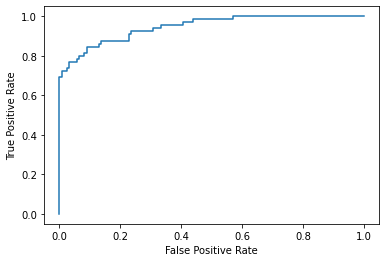

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split # validation method
from sklearn.linear_model import LogisticRegression # math model for classification

seed=1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = seed)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
y_score = model.decision_function(x_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_display=RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

## AUC Metric for ROC

In [46]:
#AUC Area under curve (ROC)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kFold = KFold(n_splits=10, random_state = 1, shuffle = True)
model = LogisticRegression(solver = "lbfgs", max_iter = 1000)
scoring = "roc_auc"
results = cross_val_score(model, x, y, cv=kFold, scoring = scoring)
print(f"AUC: {results.mean()}% {results.std()}")

AUC: 0.967121885389326% 0.021978888675321946
